# Experiments with logistic population dynamic
Inspired by this https://www.youtube.com/watch?v=ovJcsL7vyrk video. This notebook uses a very simpel dynamic 
model to illustrate how caos can be created  

In [186]:
import pandas as pd 
import numpy as np

from modelclass import model

In [187]:
flogistic = 'population = growth * population(-1) * (1- population(-1))'
mlogistic = model(flogistic,modelname = 'Logistic growth' )

In [217]:
PROJECTION_LENGTH = 10000
INITIAL_VALUE = 0.2
INITIAL_GROWTH =3.4
baseline = pd.DataFrame([[INITIAL_VALUE,INITIAL_GROWTH]]*PROJECTION_LENGTH,columns = ['POPULATION','GROWTH'])
baseline.head()

,POPULATION,GROWTH
0,0.2,3.4
1,0.2,3.4
2,0.2,3.4
3,0.2,3.4
4,0.2,3.4


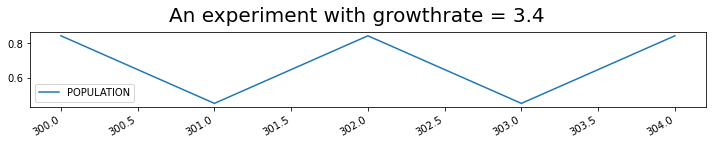

In [222]:
mlogistic(baseline,silent=1)   # run the model
with mlogistic.set_smpl(300,304): # select the first years 
    mlogistic['p*'].plot(colrow=1,top=0.8,title=f'An experiment with growthrate = {INITIAL_GROWTH}');
    # print(mlogistic['p*'].df)

In [190]:
slidedef = {'Growth rate':                {'var':'GROWTH','value':1,'min':-2, 'max':5,'op':'='} }
# Now call the input widget to display the input
input = mlogistic.inputwidget(slidedef=slidedef
                   ,showout=True,varpat='P*')

In [191]:
scenario = baseline.copy()
mlogistic.keep_solutions = {}
for g in np.linspace(0.0,4.01,num=20001):
    scenario['GROWTH'] = g
    res = mlogistic(scenario,keep = f'Growth = {g:.3f}',ljit=1)

In [192]:
with mlogistic.set_smpl(300,PROJECTION_LENGTH):
    df =  mlogistic.keep_get_dict('p*')['POPULATION'].round(decimals=13)

unique = {g:np.sort(df[g].unique()) for g in df}

In [208]:
unique_len = {g:len(a) for g,a in unique.items()}
dfu = pd.DataFrame([l for u,l in unique_len.items()],columns=['len'])

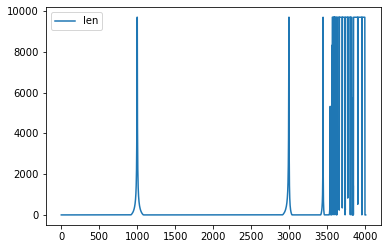

In [209]:
dfu.plot();